# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_keys}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | ulladulla
Processing Record 5 of Set 1 | rattvik
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | zheleznodorozhnyy
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | kievka
Processing Record 17 of Set 1 | kalmunai
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | jalpan
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | richards bay
Processing Record 22 of Set 1 | qu

Processing Record 44 of Set 4 | port moresby
Processing Record 45 of Set 4 | xam nua
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | west island
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | mandalgovi
Processing Record 0 of Set 5 | kitale
Processing Record 1 of Set 5 | acarau
Processing Record 2 of Set 5 | kelibia
Processing Record 3 of Set 5 | kolyvan'
Processing Record 4 of Set 5 | lala
Processing Record 5 of Set 5 | tura
Processing Record 6 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 5 | tual
Processing Record 8 of Set 5 | balaipungut
Processing Record 9 of Set 5 | lazaro cardenas
Processing Record 10 of Set 5 | sandnessjoen
Processing Record 11 of Set 5 | kavieng
Processing Record 12 of Set 5 | mazatlan
Processing Record 13 of Set 5 | stephenville
Processing Record 14 of Set 5 | calhoun
Processing Record 15 of Set 5 | north platte
Processing Record 16 of Set 5 | errachidia
Processing Rec

City not found. Skipping...
Processing Record 37 of Set 8 | starovelichkovskaya
Processing Record 38 of Set 8 | mahina
Processing Record 39 of Set 8 | ar ruways
Processing Record 40 of Set 8 | novodvinsk
Processing Record 41 of Set 8 | utrik
Processing Record 42 of Set 8 | moroni
Processing Record 43 of Set 8 | shohimardon
Processing Record 44 of Set 8 | yamada
Processing Record 45 of Set 8 | ostroleka
Processing Record 46 of Set 8 | cumana
Processing Record 47 of Set 8 | camana
Processing Record 48 of Set 8 | nevel'sk
Processing Record 49 of Set 8 | mount pearl
Processing Record 0 of Set 9 | kruisfontein
Processing Record 1 of Set 9 | kikvidze
Processing Record 2 of Set 9 | dongola
Processing Record 3 of Set 9 | tartagal
Processing Record 4 of Set 9 | gimbi
Processing Record 5 of Set 9 | saint-francois
Processing Record 6 of Set 9 | shiguai
Processing Record 7 of Set 9 | veselynove
Processing Record 8 of Set 9 | bikenibeu village
Processing Record 9 of Set 9 | santiago del estero
Proc

Processing Record 28 of Set 12 | thiruthani
Processing Record 29 of Set 12 | el dorado
Processing Record 30 of Set 12 | plattsburgh
Processing Record 31 of Set 12 | berbera
Processing Record 32 of Set 12 | nuku'alofa
Processing Record 33 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 34 of Set 12 | oppdal
Processing Record 35 of Set 12 | madalena
Processing Record 36 of Set 12 | nushki
Processing Record 37 of Set 12 | edson
Processing Record 38 of Set 12 | sahab
Processing Record 39 of Set 12 | bugiri
Processing Record 40 of Set 12 | lanark
Processing Record 41 of Set 12 | kalemie
Processing Record 42 of Set 12 | rupea
Processing Record 43 of Set 12 | el granada
Processing Record 44 of Set 12 | tarakan
Processing Record 45 of Set 12 | barakani
Processing Record 46 of Set 12 | ras gharib
City not found. Skipping...
Processing Record 47 of Set 12 | parun
Processing Record 48 of Set 12 | jalai nur
Processing Record 49 of Set 12 | tezu
Processing Record 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,26.52,72,100,3.09,US,1707874061
1,papatowai,-46.5619,169.4708,21.27,55,0,0.80,NZ,1707874076
2,crane,31.3974,-102.3501,14.39,28,73,7.83,US,1707874344
3,ulladulla,-35.3500,150.4667,17.67,90,100,5.46,AU,1707874346
4,port-aux-francais,-49.3500,70.2167,8.08,89,100,8.80,TF,1707874063


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,26.52,72,100,3.09,US,1707874061
1,papatowai,-46.5619,169.4708,21.27,55,0,0.80,NZ,1707874076
2,crane,31.3974,-102.3501,14.39,28,73,7.83,US,1707874344
3,ulladulla,-35.3500,150.4667,17.67,90,100,5.46,AU,1707874346
4,port-aux-francais,-49.3500,70.2167,8.08,89,100,8.80,TF,1707874063


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

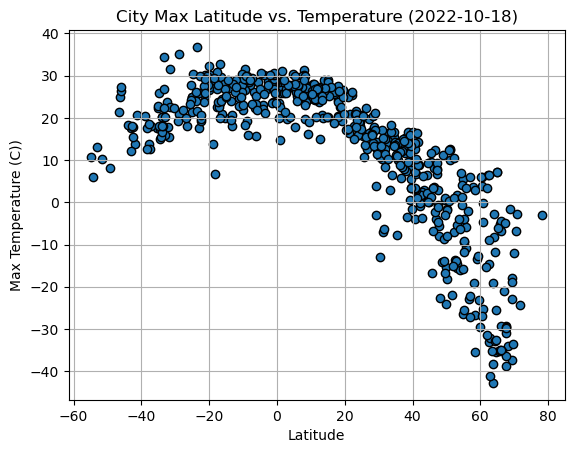

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C))")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

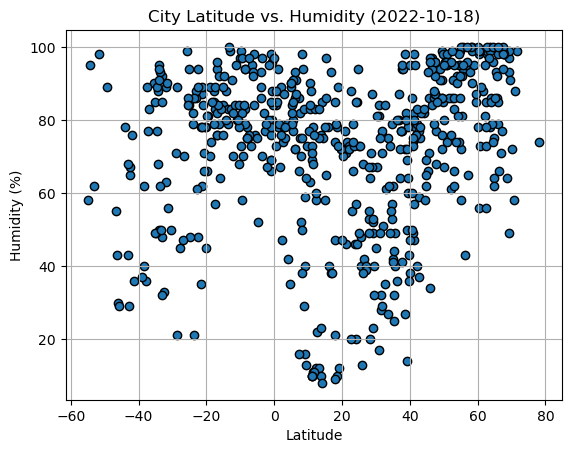

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

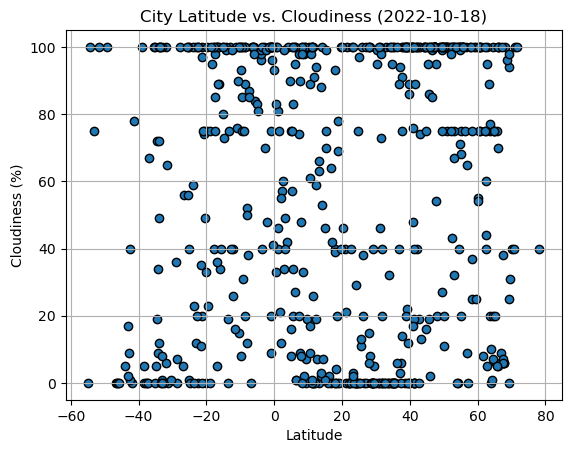

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

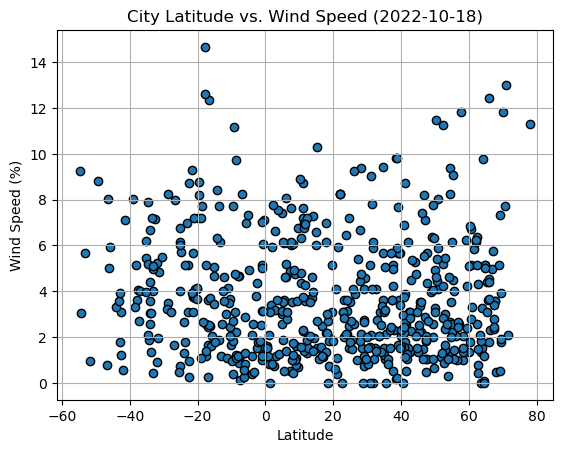

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def createLinearReg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return {"regress_values" : regress_values, "line_eq" : line_eq, "rvalue" : rvalue}

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,26.52,72,100,3.09,US,1707874061
2,crane,31.3974,-102.3501,14.39,28,73,7.83,US,1707874344
7,zheleznodorozhnyy,55.7503,38.0042,-10.71,94,100,4.02,RU,1707874066
8,bethel,41.3712,-73.4140,2.09,82,0,2.57,US,1707874063
9,klyuchi,52.2667,79.1667,-6.97,61,100,11.25,RU,1707874068


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]< 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,21.27,55,0,0.80,NZ,1707874076
3,ulladulla,-35.3500,150.4667,17.67,90,100,5.46,AU,1707874346
4,port-aux-francais,-49.3500,70.2167,8.08,89,100,8.80,TF,1707874063
5,blackmans bay,-43.0167,147.3167,17.51,43,17,1.79,AU,1707874063
6,rio grande,-32.0350,-52.0986,17.75,63,100,5.25,BR,1707874136


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8608478834527102


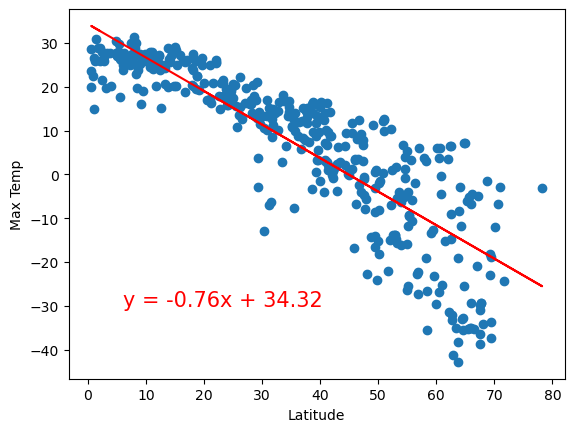

In [28]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
maxTemp = northern_hemi_df["Max Temp"]

plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat ,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(data["line_eq"],(6,-30),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5550637521245572


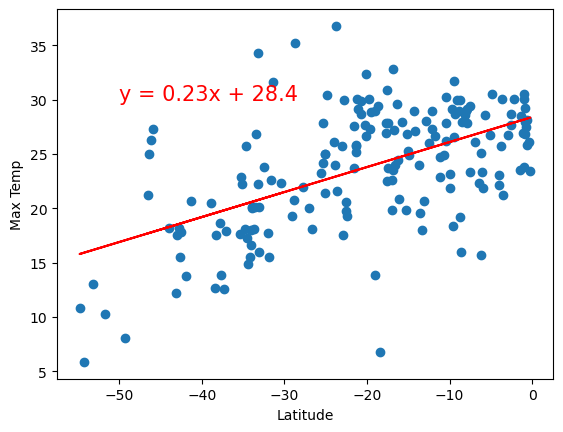

In [29]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
maxTemp = southern_hemi_df["Max Temp"]
plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(data["line_eq"],(-50,30),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The linear relationship shows that the Max Temperature increases as as it gets close to the equator. And The Max temperature drops as it gets to closer to North and South Pole. R values show there is strong negative relationship between Max Temperature and Latitude in Northern Hemisphere and moderate positive relationship between the two in Southern Hemishphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.36621081906878733


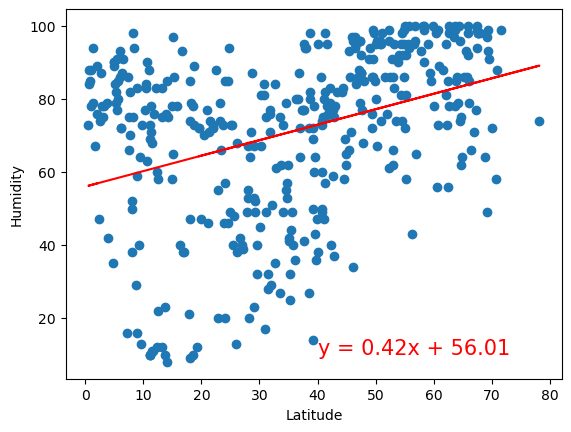

In [22]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
maxTemp = northern_hemi_df["Humidity"]

plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat ,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(data["line_eq"],(40,10),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.3931365304304549


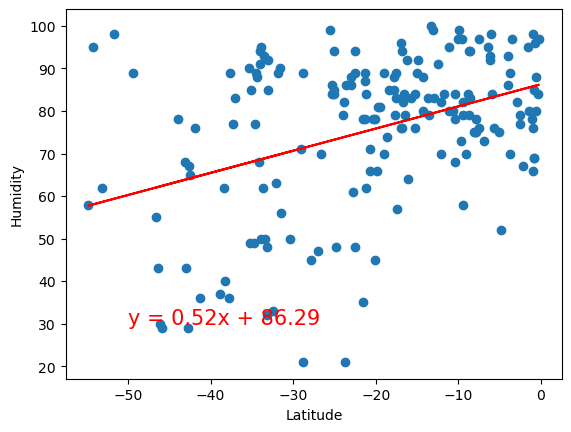

In [30]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
maxTemp = southern_hemi_df["Humidity"]
plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(data["line_eq"],(-50,30),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** A correlation coefficient (r value) of 0.36621081906878733 and 0.3931365304304549 suggest that there is a weak positive relationship between Humidity and Latitude in both Northern and Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17172546046151857


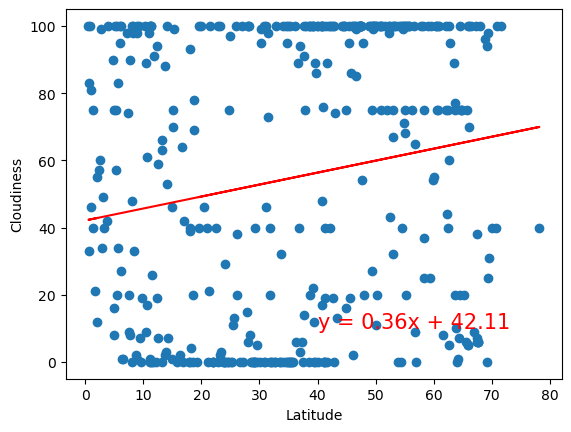

In [24]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
maxTemp = northern_hemi_df["Cloudiness"]

plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat ,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(data["line_eq"],(40,10),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.39913099131906854


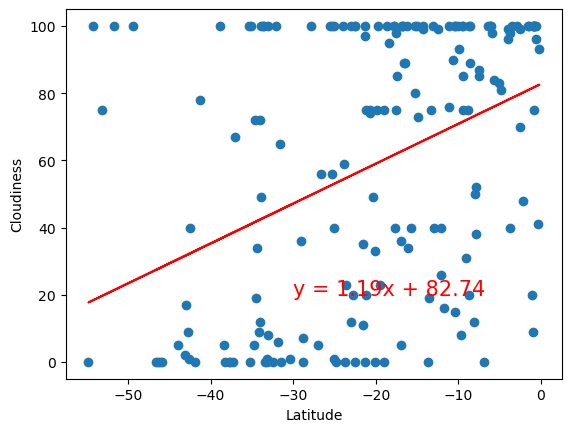

In [25]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
maxTemp = southern_hemi_df["Cloudiness"]
plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(data["line_eq"],(-30,20),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** A correlation coefficient (r value) of 0.17172546046151857 suggests a very weak positive linear relationship between the Cloudiness and Latidute in Northern Hemisphere. Also the R value of 0.39913099131906854 shows that there is a weak positive relationship between the 2 variables in Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06105915293578137


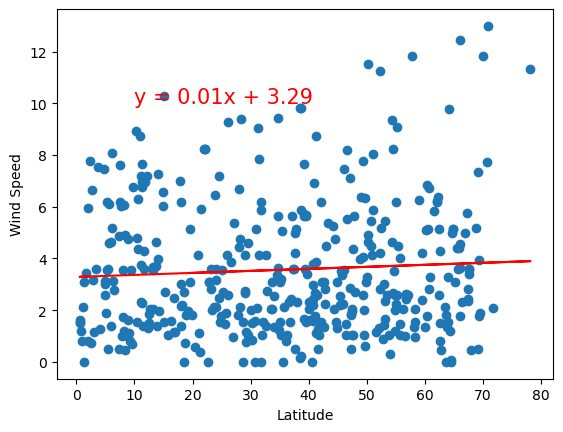

In [31]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
maxTemp = northern_hemi_df["Wind Speed"]

plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat ,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(data["line_eq"],(10,10),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.15558691012607648


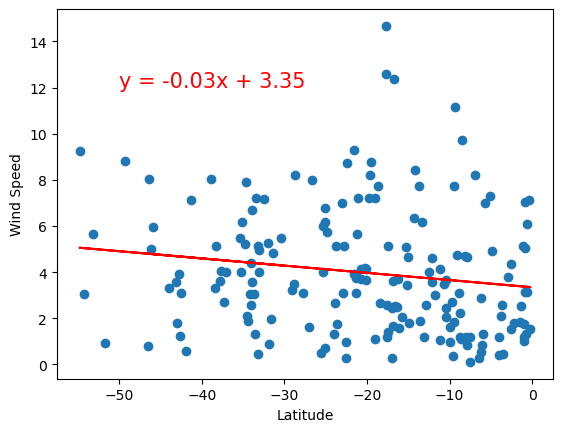

In [32]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
maxTemp = southern_hemi_df["Wind Speed"]
plt.scatter(lat, maxTemp)
data = createLinearReg(lat, maxTemp)
plt.plot(lat,data["regress_values"],color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(data["line_eq"],(-50,12),fontsize=15,color="red")
rvalue = data["rvalue"]
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** A correlation coefficient (r value) of 0.06105915293578137 suggests an extremely weak positive linear relationship between Wind Speed and Latitude in Northern Hemisphere and there is very weak negative relationship between the 2 variables in Southern Hemisphere.